## Data Exploration

ET and EEG feature comparison between Normal Reading (NR) and Task Specific Reading (TSR) / Annotation Reading (AR) for [ZuCo](https://osf.io/q3zws/)

In [104]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as io
import gzip
import math
import matplotlib
import os
import re
import scipy

from utils import *
from plot_funcs import *

In [ ]:
#NOTE: don't execute this cell
#TODO: still need to understand why those lines in Maria's code are necessary

zurich['BNCfreq'] = zurich.WORDstrip.map(lambda x: unigrdict.get(str(x).lower()))
zurich.BNCfreq = zurich.BNCfreq.fillna(zurich.BNCfreq.min())
zurich.BNCfreq = zurich.BNCfreq/100 #because 100 million word - to get freq per million
zurich.BNCfreq = np.log(zurich.BNCfreq)

zurich['BNCfreqinv']= -zurich.BNCfreq

In [2]:
# instantiate data transformer object for task 1, 2, or 3 on sentence level (no scaling for now)
datatransform_t1 = DataTransformer('task1', level='sentence', scaling='raw', fillna='zeros')
datatransform_t2 = DataTransformer('task2', level='sentence', scaling='raw', fillna='zeros')
datatransform_t3 = DataTransformer('task3', level='sentence', scaling='raw', fillna='zeros')

In [3]:
# get data for all subjects according to settings specified in cell above
# NOTE: data for each sbj will be stored in pd.DataFrame
sbjs_t1 = [datatransform_t1(i) for i in range(12)]
sbjs_t2 = [datatransform_t2(i) for i in range(12)]
sbjs_t3 = [datatransform_t3(i) for i in range(12)]

C:\Users\Lukas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [4]:
# for each dataset check whether data is complete and transformation was performed correctly
for i, (sbj_t1, sbj_t2, sbj_t3) in enumerate(zip(sbjs_t1, sbjs_t2, sbjs_t3)):
    print("Subject:", i+1)
    print()
    print("Number of sents for task 1: ", len(sbj_t1))
    print("Number of sents for task 2: ", len(sbj_t2))
    print("Number of sents for task 3: ", len(sbj_t3))
    print()

Subject: 1

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 2

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 3

Number of sents for task 1:  299
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 4

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  360

Subject: 5

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 6

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 7

Number of sents for task 1:  400
Number of sents for task 2:  250
Number of sents for task 3:  407

Subject: 8

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  359

Subject: 9

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3

### Eye-Tracking feature comparison between first and second half of Task 1 (NR)

First and second half of Task 1 (NR Sentiment) have to be compared to inspect whether an order effect has to be reported

In [5]:
# split data into first and second half
first_half, second_half = split_data(sbjs_t1)

In [ ]:
# check whether data splitting was performed correctly
for i, (first, second) in enumerate(zip(first_half, second_half)):
    print("Subject:", i)
    print()
    print("Number of sents in first half:", len(first))
    print()
    print("Number of sents in second half:", len(second))
    print()

In [112]:
# get all fixations
all_fixations_t1_first = np.array([val[0] for sbj in first_half for val in sbj.nFixations.values])
all_fixations_t1_second = np.array([val[0] for sbj in second_half for val in sbj.nFixations.values])

# get mean values for specified features per word for each subject
mean_fixations_t1_first = [sbj.nFixations.mean()[0] for sbj in first_half]
mean_fixations_t1_second = [sbj.nFixations.mean()[0] for sbj in second_half]

mean_omissions_t1_first = [sbj.omissionRate.mean()[0] for sbj in first_half]
mean_omissions_t1_second = [sbj.omissionRate.mean()[0] for sbj in second_half]

mean_trt_t1_first = [sbj.TRT.mean()[0] for sbj in first_half]
mean_trt_t1_second = [sbj.TRT.mean()[0] for sbj in second_half]

mean_gd_t1_first = [sbj.GD.mean()[0] for sbj in first_half]
mean_gd_t1_second = [sbj.GD.mean()[0] for sbj in second_half]

mean_ffd_t1_first = [sbj.FFD.mean()[0] for sbj in first_half]
mean_ffd_t1_second = [sbj.FFD.mean()[0] for sbj in second_half]

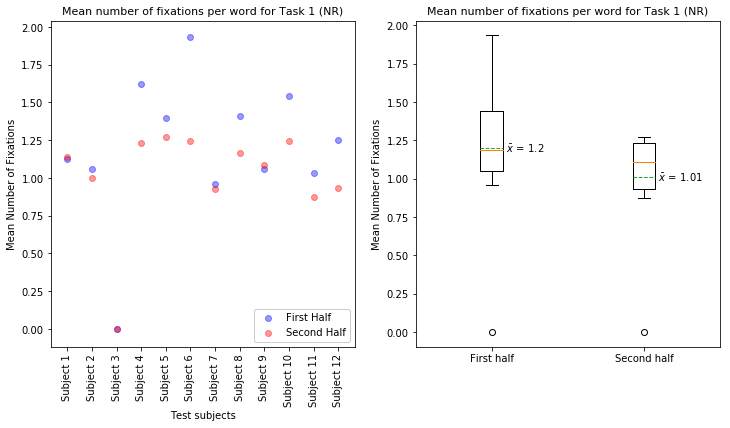

In [110]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(np.arange(0, 12), mean_fixations_t1_first, alpha=0.4, color='blue', label='First Half')
ax[0].scatter(np.arange(0, 12), mean_fixations_t1_second, alpha=0.4, color='red', label='Second Half')
ax[0].set_xticks(ticks=np.arange(0, 12))
ax[0].set_xticklabels(labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
ax[0].set_xlabel("Test subjects")
ax[0].set_ylabel("Mean Number of Fixations")
ax[0].legend(fancybox=True, framealpha=1, loc='lower right')
ax[0].set_title("Mean number of fixations per word for Task 1 (NR)", fontsize=11)

boxplot = ax[1].boxplot([mean_fixations_t1_first, mean_fixations_t1_second], showmeans=True,
           labels=['First Half', 'Second Half'], meanline=True)
ax[1].set_xticks(ticks=np.arange(1, 3))
ax[1].set_xticklabels(labels=['First half', 'Second half'])
ax[1].set_ylabel("Mean Number of Fixations")
ax[1].set_title("Mean number of fixations per word for Task 1 (NR)", fontsize=11)
show_means(ax[1], boxplot)

plt.show()

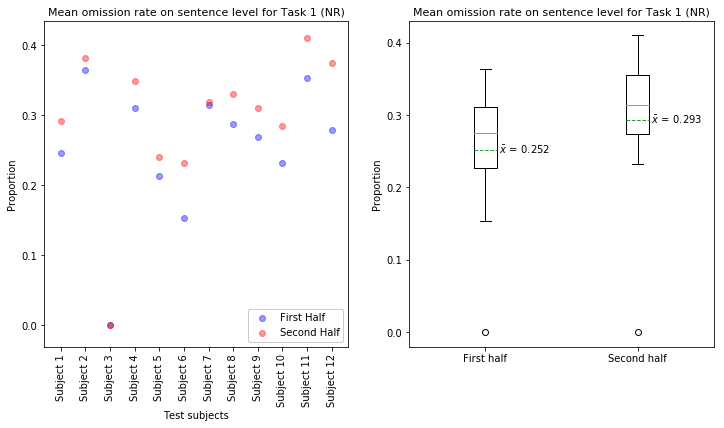

In [115]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(np.arange(0, 12), mean_omissions_t1_first, alpha=0.4, color='blue', label='First Half')
ax[0].scatter(np.arange(0, 12), mean_omissions_t1_second, alpha=0.4, color='red', label='Second Half')
ax[0].set_xticks(ticks=np.arange(0, 12))
ax[0].set_xticklabels(labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
ax[0].set_xlabel("Test subjects")
ax[0].set_ylabel("Proportion")
ax[0].legend(fancybox=True, framealpha=1, loc='lower right')
ax[0].set_title("Mean omission rate on sentence level for Task 1 (NR)", fontsize=11)

boxplot = ax[1].boxplot([mean_omissions_t1_first, mean_omissions_t1_second], showmeans=True,
           labels=['First Half', 'Second Half'], meanline=True)
ax[1].set_xticks(ticks=np.arange(1, 3))
ax[1].set_xticklabels(labels=['First half', 'Second half'])
ax[1].set_ylabel("Proportion")
ax[1].set_title("Mean omission rate on sentence level for Task 1 (NR)", fontsize=11)
show_means(ax[1], boxplot)

plt.show()

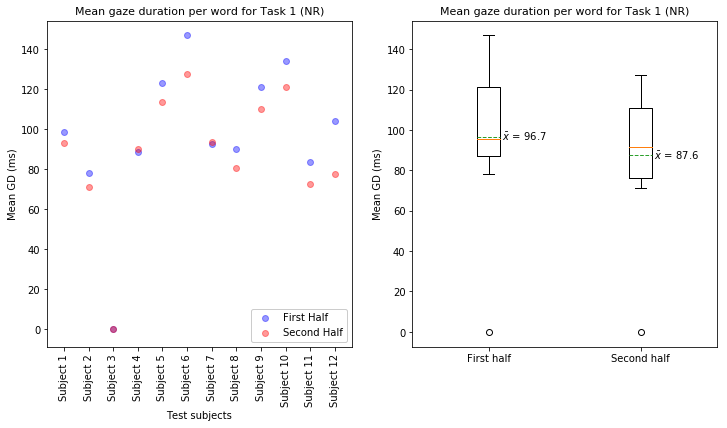

In [119]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(np.arange(0, 12), mean_gd_t1_first, alpha=0.4, color='blue', label='First Half')
ax[0].scatter(np.arange(0, 12), mean_gd_t1_second, alpha=0.4, color='red', label='Second Half')
ax[0].set_xticks(ticks=np.arange(0, 12))
ax[0].set_xticklabels(labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
ax[0].set_xlabel("Test subjects")
ax[0].set_ylabel("Mean GD (ms)")
ax[0].legend(fancybox=True, framealpha=1, loc='lower right')
ax[0].set_title("Mean gaze duration per word for Task 1 (NR)", fontsize=11)

boxplot = ax[1].boxplot([ mean_gd_t1_first, mean_gd_t1_second], showmeans=True,
           labels=['First Half', 'Second Half'], meanline=True)
ax[1].set_xticks(ticks=np.arange(1, 3))
ax[1].set_xticklabels(labels=['First half', 'Second half'])
ax[1].set_ylabel("Mean GD (ms)")
ax[1].set_title("Mean gaze duration per word for Task 1 (NR)", fontsize=11)
show_means(ax[1], boxplot)

plt.show()

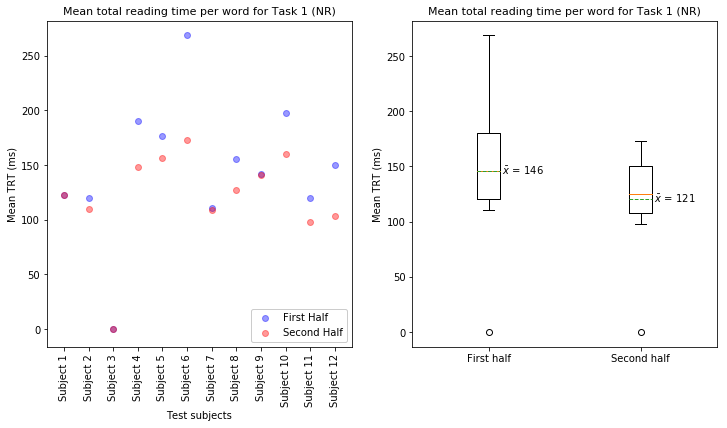

In [122]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(np.arange(0, 12), mean_trt_t1_first, alpha=0.4, color='blue', label='First Half')
ax[0].scatter(np.arange(0, 12), mean_trt_t1_second, alpha=0.4, color='red', label='Second Half')
ax[0].set_xticks(ticks=np.arange(0, 12))
ax[0].set_xticklabels(labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
ax[0].set_xlabel("Test subjects")
ax[0].set_ylabel("Mean TRT (ms)")
ax[0].legend(fancybox=True, framealpha=1, loc='lower right')
ax[0].set_title("Mean total reading time per word for Task 1 (NR)", fontsize=11)

boxplot = ax[1].boxplot([mean_trt_t1_first,  mean_trt_t1_second], showmeans=True,
           labels=['First Half', 'Second Half'], meanline=True)
ax[1].set_xticks(ticks=np.arange(1, 3))
ax[1].set_xticklabels(labels=['First half', 'Second half'])
ax[1].set_ylabel("Mean TRT (ms)")
ax[1].set_title("Mean total reading time per word for Task 1 (NR)", fontsize=11)
show_means(ax[1], boxplot)

plt.show()

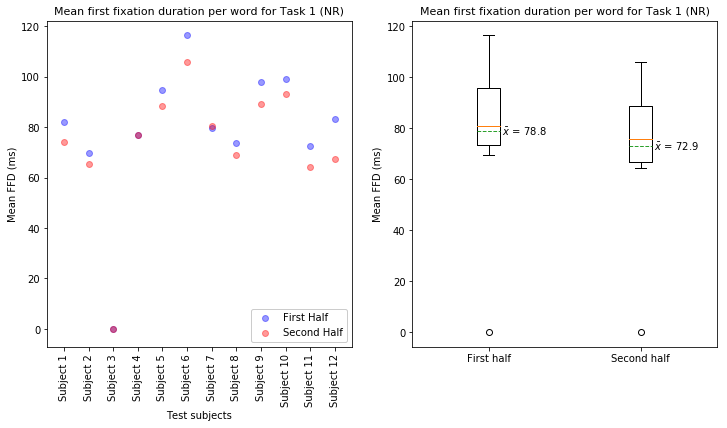

In [124]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].scatter(np.arange(0, 12), mean_ffd_t1_first, alpha=0.4, color='blue', label='First Half')
ax[0].scatter(np.arange(0, 12), mean_ffd_t1_second, alpha=0.4, color='red', label='Second Half')
ax[0].set_xticks(ticks=np.arange(0, 12))
ax[0].set_xticklabels(labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
ax[0].set_xlabel("Test subjects")
ax[0].set_ylabel("Mean FFD (ms)")
ax[0].legend(fancybox=True, framealpha=1, loc='lower right')
ax[0].set_title("Mean first fixation duration per word for Task 1 (NR)", fontsize=11)

boxplot = ax[1].boxplot([mean_ffd_t1_first,  mean_ffd_t1_second], showmeans=True,
           labels=['First Half', 'Second Half'], meanline=True)
ax[1].set_xticks(ticks=np.arange(1, 3))
ax[1].set_xticklabels(labels=['First half', 'Second half'])
ax[1].set_ylabel("Mean FFD (ms)")
ax[1].set_title("Mean first fixation duration per word for Task 1 (NR)", fontsize=11)
show_means(ax[1], boxplot)

plt.show()

### Eye-Tracking feature comparison between Task 2 (NR) and Task 3 (TSR)

In [126]:
# get all fixations
all_fixations_t2 = np.array([val[0] for sbj in sbjs_t2 for val in sbj.nFixations.values])
all_fixations_t3 = np.array([val[0] for sbj in sbjs_t3 for val in sbj.nFixations.values])

# get mean values for specified features per word for each subject
mean_fixations_t2 = [sbj.nFixations.mean()[0] for sbj in sbjs_t2]
mean_fixations_t3 = [sbj.nFixations.mean()[0] for sbj in sbjs_t3]

mean_omissions_t2 = [sbj.omissionRate.mean()[0] for sbj in sbjs_t2]
mean_omissions_t3 = [sbj.omissionRate.mean()[0] for sbj in sbjs_t3]

mean_trt_t2 = [sbj.TRT.mean()[0] for sbj in sbjs_t2]
mean_trt_t3 = [sbj.TRT.mean()[0] for sbj in sbjs_t3]

mean_gd_t2 = [sbj.GD.mean()[0] for sbj in sbjs_t2]
mean_gd_t3 = [sbj.GD.mean()[0] for sbj in sbjs_t3]

mean_ffd_t2 = [sbj.FFD.mean()[0] for sbj in sbjs_t2]
mean_ffd_t3 = [sbj.FFD.mean()[0] for sbj in sbjs_t3]

In [ ]:
print("Mean number of fixations task 2:", round(np.mean(mean_fixations_t2), 2))
print("Mean number of fixations task 3:", round(np.mean(mean_fixations_t3), 2))

plt.scatter(np.arange(0, 12), mean_fixations_t2, alpha=0.4, color='blue', label='Task 2 (NR)')
plt.scatter(np.arange(0, 12), mean_fixations_t3, alpha=0.4, color='red', label='Task 3 (TSR)')
plt.xticks(ticks=np.arange(0, 12), labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
plt.xlabel("Test subjects")
plt.ylabel("Mean number of fixations")
plt.legend(fancybox=True, framealpha=1, loc='lower right')
plt.title("Mean number of fixations per word", fontsize=11)
plt.show()

In [ ]:
print("Mean omission rate for Task 2 (NR):", round(np.mean(mean_omissions_t2), 2))
print("Mean omission rate for Task 3 (TSR):", round(np.mean(mean_omissions_t3), 2))

plt.scatter(np.arange(0, 12), mean_omissions_t2, alpha=0.4, color='blue', label='Task 2 (NR)')
plt.scatter(np.arange(0, 12), mean_omissions_t3, alpha=0.4, color='red', label='Task 3 (TSR)')
plt.xticks(ticks=np.arange(0, 12), labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
plt.xlabel("Test subjects")
plt.ylabel("Proportion")
plt.legend(fancybox=True, framealpha=1, loc='lower right')
plt.title("Mean omission rate on sentence level", fontsize=11)
plt.show()

In [ ]:
print("Mean gaze duration for Task 2 (NR): {} ms".format(round(np.mean(mean_gd_t2), 2)))
print("Mean gaze duration for Task 3 (TSR): {} ms".format(round(np.mean(mean_gd_t3), 2)))

plt.scatter(np.arange(0, 12), mean_gd_t2, alpha=0.4, color='blue', label='Task 2 (NR)')
plt.scatter(np.arange(0, 12), mean_gd_t3, alpha=0.4, color='red', label='Task 3 (TSR)')
plt.xticks(ticks=np.arange(0, 12), labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
plt.xlabel("Test subjects")
plt.ylabel("Mean GD (ms)")
plt.legend(fancybox=True, framealpha=1, loc='lower right')
plt.title("Mean gaze duration per word", fontsize=11)
plt.show()

In [ ]:
print("Mean total reading time for Task 2 (NR): {} ms".format(round(np.mean(mean_trt_t2), 2)))
print("Mean total reading time for Task 3 (TSR): {} ms".format(round(np.mean(mean_trt_t3), 2)))

plt.scatter(np.arange(0, 12), mean_trt_t2, alpha=0.4, color='blue', label='Task 2 (NR)')
plt.scatter(np.arange(0, 12), mean_trt_t3, alpha=0.4, color='red', label='Task 3 (TSR)')
plt.xticks(ticks=np.arange(0, 12), labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
plt.xlabel("Test subjects")
plt.ylabel("Mean TRT (ms)")
plt.legend(fancybox=True, framealpha=1, loc='lower right')
plt.title("Mean total reading time per word", fontsize=11)
plt.show()

In [ ]:
print("Mean first fixation duration per word for Task 2 (NR): {} ms".format(round(np.mean(mean_ffd_t2), 2)))
print("Mean first fixation duration per word for Task 3 (TSR): {} ms".format(round(np.mean(mean_ffd_t3), 2)))

plt.scatter(np.arange(0, 12), mean_ffd_t2, alpha=0.4, color='blue', label='First Half')
plt.scatter(np.arange(0, 12), mean_ffd_t3, alpha=0.4, color='red', label='Second Half')
plt.xticks(ticks=np.arange(0, 12), labels=['Subject'+' '+str(i) for i in range(1, 13)], rotation=90)
plt.xlabel("Test subjects")
plt.ylabel("Mean FFD (ms)")
plt.legend(fancybox=True, framealpha=1, loc='lower right')
plt.title("Mean first fixation duration per word", fontsize=11)
plt.show()